In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# already cleaned dataset
df = pd.read_csv('C:/Users/krtfe/Downloads/497dfRMNA.csv')

# drop duplicates
ddf = df.drop_duplicates(subset=['Address'], keep='first')

# taking the mean vector
vectMean = ddf.iloc[:,13]

# taking the count values of the mean
countM, bins_countM = np.histogram(vectMean, bins=100)

# computing the pdf of the mean using the count values
pdfMean = countM/sum(countM)

# computing the cdf of the mean using the pdf
cdfMean = np.cumsum(pdfMean)

# lists
KLlist = []
abslist = []
sselist = []

# computing the KL-divergence, absolute error, and SSE 
for i in range(3, 13):
    # basically repeated from above but with each draw
    vect = ddf.iloc[:, i]
    count, bins_count = np.histogram(vect, bins=100)
    pdf = count/sum(count)
    cdf = np.cumsum(pdf)
    
    # adding values to the lists
    abslist.append(round(sum(abs(cdf-cdfMean)), 5))
    sselist.append(round(sum(abs(cdf-cdfMean)**2), 5))
    KLlist.append(round(max(abs(cdf-cdfMean)), 5))

# data frame of the calculated differences
normDf = pd.DataFrame({'Sum of Absolute Error': abslist, 
                       'SSE': sselist, 
                       'KL Divergence': KLlist}, 
                      index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(normDf)

    Sum of Absolute Error      SSE  KL Divergence
1                 4.10291  1.59787        0.62182
2                 4.47923  1.88863        0.66832
3                 3.98822  1.43560        0.58400
4                 2.15375  0.40301        0.30874
5                 2.18351  0.39138        0.29138
6                 7.10725  1.76473        0.39740
7                 4.00248  0.73796        0.29014
8                 1.53751  0.14673        0.14693
9                 6.83385  1.91056        0.43211
10                6.71730  1.86500        0.43211


Text(589.2, 0.5, 'Draws 1-10')

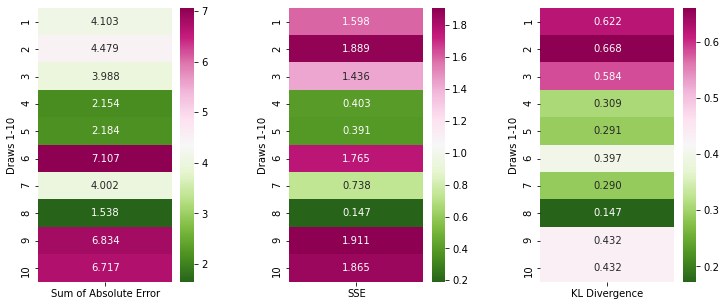

In [126]:
import seaborn as sb

# making a heatmap of the above dataframe
fig, (SAE, SSE, KL) = plt.subplots(ncols = 3, figsize=(12, 10),
                                   gridspec_kw={'width_ratios': [2, 2, 2], 
                                            'wspace': 0.5, 
                                            'bottom': 0.5})

# heatmap of the sum of absolute errors
sb.heatmap(normDf[normDf.columns[:1]], 
           annot = True, 
           robust = True, 
           ax = SAE, 
           xticklabels = True,
           cmap = 'PiYG_r',
           fmt = '.3f')
SAE.set_ylabel('Draws 1-10')

# heatmap of the sse
sb.heatmap(normDf[normDf.columns[1:2]], 
           annot = True, 
           robust = True, 
           ax = SSE,
           cmap = 'PiYG_r',
           fmt = '.3f')
SSE.set_ylabel('Draws 1-10')

# heatmap of KL-divergence
sb.heatmap(normDf[normDf.columns[2:3]], 
           annot = True, 
           robust = True, 
           ax = KL,
           cmap = 'PiYG_r',
           fmt = '.3f')
KL.set_ylabel('Draws 1-10')


